In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

#### Lendo os datasets

In [19]:
df = pd.read_csv("../data/data_3__.csv", delimiter=",")

,index,data,valor
0,0,2018-08-21,3914.55
1,1,2018-08-22,3713.02
2,2,2018-08-23,8001.75
3,3,2018-08-24,11312.95
4,4,2018-08-25,15230.01
...,...,...,...
67,67,2018-10-27,15060.21
68,68,2018-10-28,13367.74
69,69,2018-10-29,4178.29
70,70,2018-10-30,2623.59


In [3]:
df.drop('index', axis=1, inplace=True)

### Transformando os valores de data

In [4]:
df['data'] = pd.to_datetime(df['data'])

### Calculando o valor mensal

In [5]:
vetUnicos = df['data'].dt.strftime('%Y-%m').unique()

In [6]:
acumulos = []
for i in vetUnicos:
    acumulos.append(df[df['data'].dt.strftime('%Y-%m') == (i)].sum().valor)

In [7]:
dicionario = {"data":vetUnicos, "total":acumulos}
dfMeses = pd.DataFrame(data=dicionario)
dfMeses

,data,total
0,2018-08,83050.67
1,2018-09,296706.28
2,2018-10,275052.14


In [8]:
dfMeses['data'] = pd.to_datetime(dfMeses['data'])

In [9]:
vetorAnos = dfMeses['data'].dt.strftime('%Y')
vetorMeses = dfMeses['data'].dt.strftime('%m')

dicionarioFinal = {"ano":vetorAnos, "mes":vetorMeses, "totalPorMes":dfMeses['total']}
dfFinal = pd.DataFrame(data=dicionarioFinal)

ordem = ['ano', 'mes']
dfFinal = dfFinal.sort_values(by= ordem)

In [10]:
dfFinal

,ano,mes,totalPorMes
0,2018,08,83050.67
1,2018,09,296706.28
2,2018,10,275052.14


### Normalizando os dados

In [11]:
#scaler = MinMaxScaler() 
#scaled_values = scaler.fit_transform(dfFinal) 
#dfFinal['totalPorMes'] = scaled_values
#dfFinal['totalPorMes'].plot();

### Separando treino e teste

In [12]:
dfteste = dfFinal[dfFinal.index == dfFinal.index[-1]]
dfTrain = dfFinal.drop(dfFinal.index[-1], axis=0)

X_test = dfteste.drop("totalPorMes", axis=1)
y_test = dfteste['totalPorMes']


X_train = dfTrain.drop("totalPorMes", axis=1)
y_train = dfTrain["totalPorMes"]

In [13]:
Vetmae = []
Vetmse = []
Vetrmse = []
modelo = []

## RadomForest

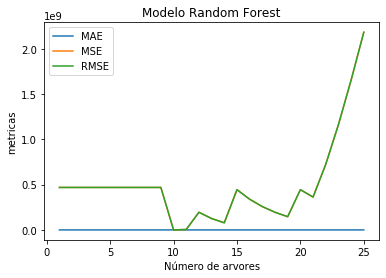

In [14]:
neighbors = np.arange(1, 26)
mae = np.empty(len(neighbors))
mse = np.empty(len(neighbors))
rmse = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    rf = RandomForestRegressor(random_state=5, n_estimators=k)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mae[i] = metrics.mean_absolute_error(y_test, y_pred)
    mse[i] = metrics.mean_squared_error(y_test, y_pred)
    rmse[i] = metrics.mean_squared_error(y_test, y_pred)

# gerando o grafico
plt.title('Modelo Random Forest')
plt.plot(neighbors, mae, label = 'MAE')
plt.plot(neighbors, mse, label = 'MSE')
plt.plot(neighbors, rmse, label = 'RMSE')
plt.legend()
plt.xlabel('Número de arvores')
plt.ylabel('metricas')
plt.show()

In [30]:
rf = RandomForestRegressor(random_state=5, n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('MAE:', mae)  
print('MSE:', mse)  
print('RMSE:', rmse)

modelo.append("RandomForest")
Vetmae.append(mae)
Vetmse.append(mse)
Vetrmse.append(rmse)

MAE: 288.5789999999106
MSE: 83277.8392409484
RMSE: 288.5789999999106


In [31]:
y_test

2    275052.14
Name: totalPorMes, dtype: float64

In [32]:
y_pred

array([275340.719])

## KNN

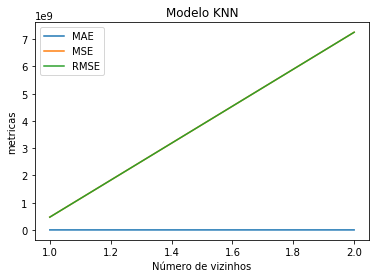

In [22]:
neighbors = np.arange(1, 3)
mae = np.empty(len(neighbors))
mse = np.empty(len(neighbors))
rmse = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    kn = KNeighborsRegressor(n_neighbors=k)
    kn.fit(X_train, y_train)
    y_pred = kn.predict(X_test)
    mae[i] = metrics.mean_absolute_error(y_test, y_pred)
    mse[i] = metrics.mean_squared_error(y_test, y_pred)
    rmse[i] = metrics.mean_squared_error(y_test, y_pred)

# gerando o grafico
plt.title('Modelo KNN')
plt.plot(neighbors, mae, label = 'MAE')
plt.plot(neighbors, mse, label = 'MSE')
plt.plot(neighbors, rmse, label = 'RMSE')
plt.legend()
plt.xlabel('Número de vizinhos')
plt.ylabel('metricas')
plt.show()

In [23]:
kn = KNeighborsRegressor(n_neighbors=1)
kn.fit(X_train, y_train)
y_pred = kn.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('MAE:', mae)  
print('MSE:', mse)  
print('RMSE:', rmse)

modelo.append("KNN")
Vetmae.append(mae)
Vetmse.append(mse)
Vetrmse.append(rmse)

MAE: 21654.139999999956
MSE: 468901779.1395981
RMSE: 21654.139999999956


In [ ]:
y_test

In [ ]:
y_pred

### BayesianRidge

In [24]:
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('MAE:', mae)  
print('MSE:', mse)  
print('RMSE:', rmse)

modelo.append("Bayesian")
Vetmae.append(mae)
Vetmse.append(mse)
Vetrmse.append(rmse)

MAE: 85173.66498595843
MSE: 7254553207.140281
RMSE: 85173.66498595843


### LinearRegression

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('MAE:', mae)  
print('MSE:', mse)  
print('RMSE:', rmse)

modelo.append("Linear Regression")
Vetmae.append(mae)
Vetmse.append(mse)
Vetrmse.append(rmse)

MAE: 235309.75000000012
MSE: 55370678445.06255
RMSE: 235309.75000000012


In [26]:
y_test

2    275052.14
Name: totalPorMes, dtype: float64

In [27]:
y_pred

array([510361.89])

In [28]:
modelo

['RandomForest', 'KNN', 'Bayesian', 'Linear Regression']

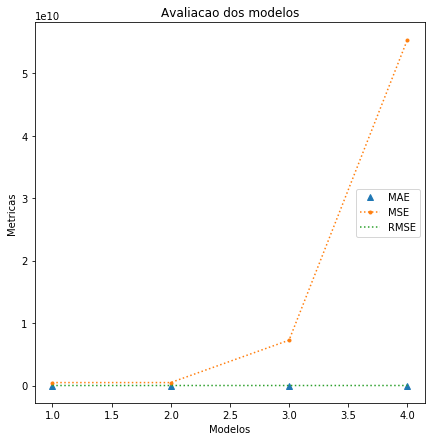

In [29]:
modelos = np.arange(1, len(modelo)+1)

plt.figure(figsize=[7,7])
plt.title('Avaliacao dos modelos')
plt.plot(modelos, Vetmae, '^', label = 'MAE')
plt.plot(modelos, Vetmse, ':.', label = 'MSE')
plt.plot(modelos, Vetrmse,':', label = 'RMSE')
plt.legend(loc='right')
plt.xlabel('Modelos')
plt.ylabel('Metricas')
plt.show()